In [1]:
import pandas as pd

df = pd.read_excel('../../data/Outscraper.xlsx')
print(df.head())

                                     query                         name  \
0  restaurant, 19148, Philadelphia, PA, US  Wokworks South Philadelphia   
1  restaurant, 19148, Philadelphia, PA, US                    Mish Mish   
2  restaurant, 19148, Philadelphia, PA, US                 Oregon Diner   
3  restaurant, 19148, Philadelphia, PA, US              1731 Restaurant   
4  restaurant, 19148, Philadelphia, PA, US            Popi's Restaurant   

               name_for_emails  \
0  Wokworks South Philadelphia   
1                    Mish Mish   
2                 Oregon Diner   
3              1731 Restaurant   
4             Popis Restaurant   

                                                site  \
0  https://wokworks.typeform.com/to/wZxsXfXS?type...   
1                    https://www.mishmishphilly.com/   
2                      http://oregondinerphilly.com/   
3                        https://1731restaurant.com/   
4                    http://www.popisrestaurant.com/   

       

In [2]:
subdf=pd.read_csv('../../data/census_subset_clean.csv')

In [3]:
df[['population', 'median_income']] = subdf[['population', 'median_income']]

In [4]:
def categorize(text):
    for category, keywords in keyword_map.items():
        if any(keyword.lower() in text.lower() for keyword in keywords):
            return category
    return "other"  
keyword_map = {
    "Asian food": [
        "Vietnamese", "Sichuan", "Japanese", "Indonesian", "Thai", "Chinese", 
        "Korean", "Filipino", "Malaysian", "Taiwanese", "Pakistani", "Afghan", 
        "Nepalese", "Tibetan", "Cambodian", "Asian", "Pan-Asian", "Southeast Asian",
        "Dan Dan", "Pho", "Shabu-shabu", "Ramen"
    ],
    "European and US food": [
        "Italian", "European", "American", "Western", "US", "French", "Irish", 
        "Greek", "Portuguese", "German", "Spanish", "Swedish", "Polish", 
        "British", "Dutch", "Modern European", "Mid-Atlantic", "Southern Italian"
    ],
    "African food": [
        "Ethiopian", "Eritrean", "Moroccan", "Tunisian", "West African", "African"
    ],
    "Middle Eastern food": [
        "Lebanese", "Israeli", "Turkish", "Halal", "Kosher", "Georgian", "Yemeni"
    ],
    "Latin American and Caribbean food": [
        "Mexican", "Honduran", "Salvadoran", "Guatemalan", "Colombian", 
        "Brazilian", "Argentinian", "Peruvian", "Puerto Rican", "Cuban", 
        "Venezuelan", "Latin American", "Caribbean"
    ],
    "Indian food": [
        "Indian", "Modern Indian", "South Indian", "Indian takeaway"
    ],
    "Fast food": [
        "Pizza", "Fast food", "Fried chicken", "Hot dog", "Burger", 
        "Takeout", "Delivery", "Wings", "Donut", "Burrito", "Taco"
    ],
    "Vegan and healthy food": [
        "Vegan", "Vegetarian", "Organic", "Health food", "Salad", "Raw food", 
        "Juice", "Açaí", "Fresh food"
    ],
    "Desserts and snacks": [
        "Ice cream", "Dessert", "Snack", "Pretzel", "Bakery", "Creperie", "Donut"
    ],
    "Drinks and bars": [
        "Bar", "Cocktail", "Pub", "Brewery", "Beer", "Wine", "Liquor", 
        "Beer garden", "Brewpub", "Karaoke", "Hookah", "Lounge", "Club", 
        "Sports bar", "Coffee", "Tea", "Juice"
    ],
    "Seafood": [
        "Seafood", "Crab", "Oyster", "Fish & chips"
    ],
    "Buffet and mixed cuisine": [
        "Buffet", "Fusion", "Eclectic", "Dim sum", "Asian fusion"
    ],
    "Specialty or ethnic": [
        "Cambodian", "Uzbeki", "Ecuadorian", "Georgian", "Jewish", "Bangladeshi", "Laotian"
    ],
    "Catering and service": [
        "Caterer", "Catering", "Personal chef", "Mobile caterer", "Cooking class", 
        "Event", "Entertainment", "Catering equipment"
    ],
    "Other / uncategorized": [
        "Market", "Grocery", "Store", "Mall", "Hotel", "Bed & breakfast", 
        "Convenience store", "Food court", "Shopping", "Self service", 
        "Association", "Vitamin", "Smoke shop", "Lingerie"
    ]
}
df["category"] = df["type"].astype(str).apply(categorize)

In [5]:
df.groupby('type').rating.mean()
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
df['price'] = df['range'].map(price_mapping) 

In [6]:
df = df.dropna(subset=["rating"])
df["rating"] = df["rating"].fillna(df["rating"].median()) 
df = df.dropna(subset=["rating"])
df['price'].fillna(df['price'].median(), inplace=True)
df = df[df['city'].str.contains('Philadelphia', case=False, na=False)]

/var/folders/y6/68vnvhnn5lq29tm5q9k42_600000gn/T/ipykernel_11622/2910396506.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)


In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

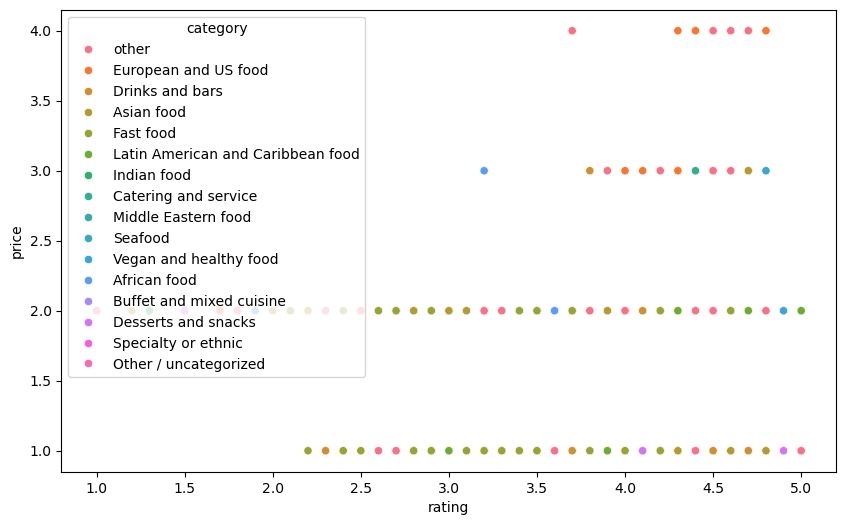

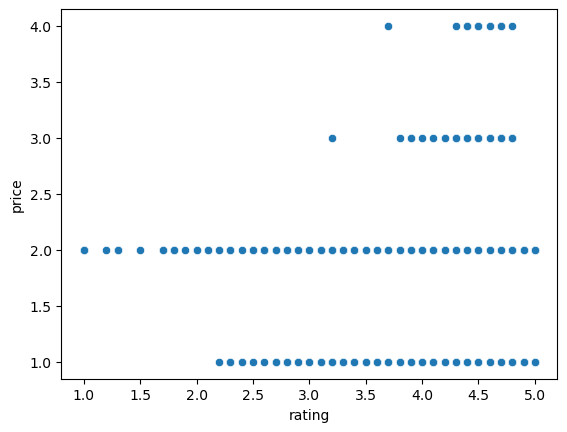

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='rating',y='price',hue='category')
plt.show()
sns.scatterplot(data=df, x='rating',y='price')
plt.show()